In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import string  
import spacy 
import nltk
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("/hotel_reviews.csv",encoding = "ISO-8859-1")
data.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


# Exploratory Data Analysis

In [3]:
data.shape

(20491, 2)

In [4]:
data.describe()

,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [6]:
data['Rating'].value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

In [7]:
data.nunique()

Review    20491
Rating        5
dtype: int64

# Missing values

In [8]:
data.isnull().sum()

Review    0
Rating    0
dtype: int64

In [9]:
# Count of Duplicated rows
data[data.duplicated()].shape

(0, 2)

# Visualization

In [10]:
correlations = data.corr()
correlations

,Rating
Rating,1.0


# Univariate histogram and Correlation analysis

Text(0, 0.5, 'Count')

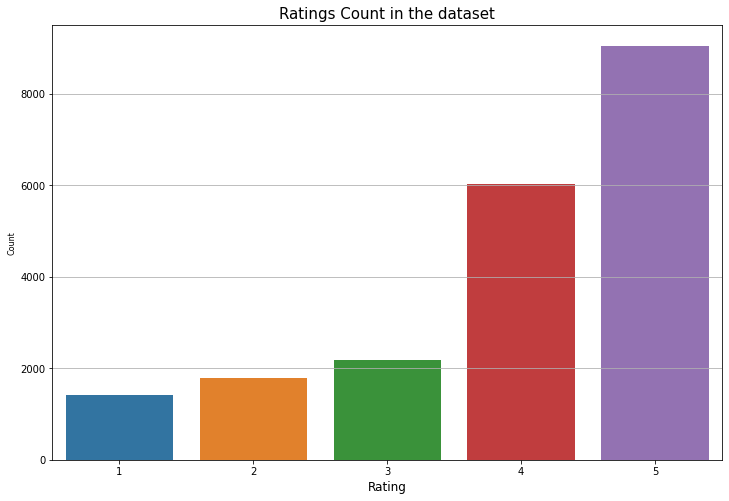

In [11]:
# Univariate Histograms
data.hist(figsize=(12, 8))
sns.countplot(data['Rating'])
plt.title('Ratings Count in the dataset',fontsize=15)
plt.xlabel('Rating',fontsize=12)
plt.ylabel('Count',fontsize=8)

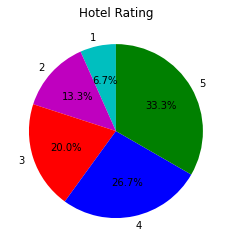

In [12]:
Rating=[1,2,3,4,5]
activity=[1,2,3,4,5]
cols=['c','m','r','b','g']

plt.title('Hotel Rating')
plt.pie(Rating,
       labels=activity,
       colors=cols,
       startangle=90,
       autopct="%1.1f%%")
plt.show()

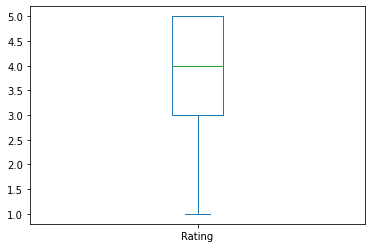

<Figure size 720x504 with 0 Axes>

In [13]:
# Box and Whisker Plots
data.plot(kind='box', subplots=True, layout=(1,1), sharex=False, sharey=False)
fig=plt.figure(figsize=(10,7))
plt.show()

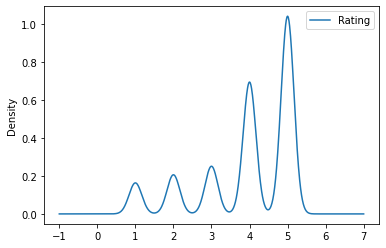

<Figure size 720x504 with 0 Axes>

In [14]:
# Univariate Density Plots
data.plot(kind='density', subplots=True, layout=(1,1), sharex=False)
fig=plt.figure(figsize=(10,7))
plt.show()

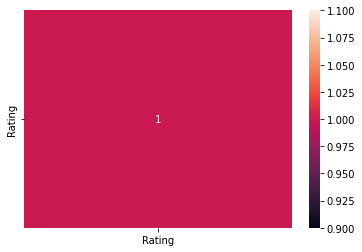

In [15]:
sns.heatmap(correlations,xticklabels=correlations.columns, yticklabels=correlations.columns,annot=True)

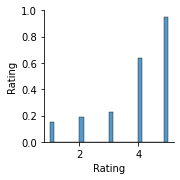

In [16]:
sns.pairplot(data)

# Word Cloud

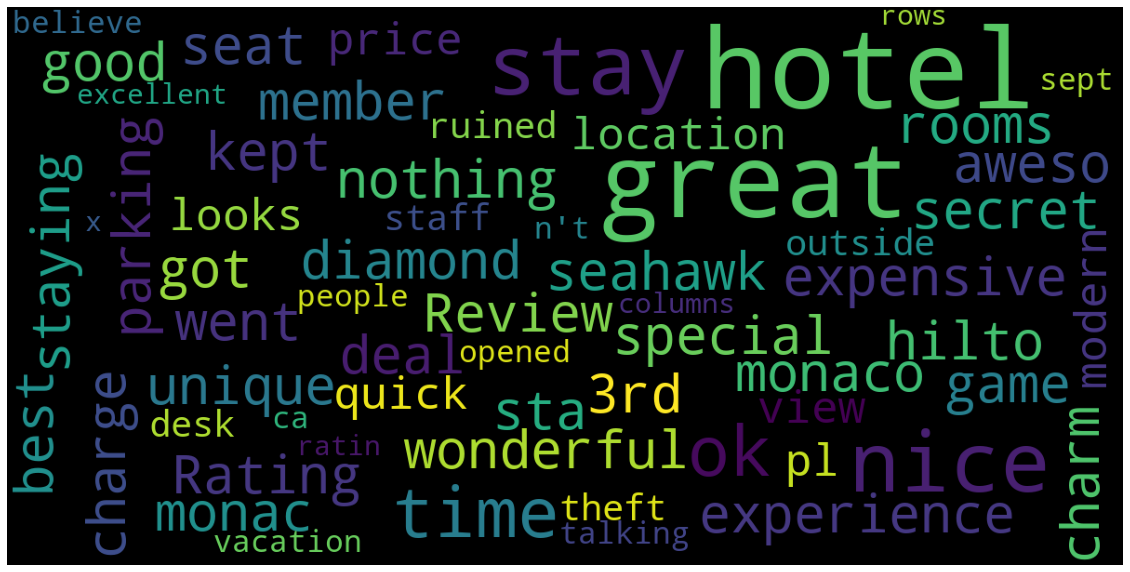

In [17]:
#pip install wordcloud
# wordcloud function
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'Black',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(data)

In [18]:
(data['Rating'].value_counts()/data.shape[0])*100

5    44.185252
4    29.471475
3    10.658338
2     8.750183
1     6.934752
Name: Rating, dtype: float64

In [19]:
list(data['Review'])[:3]

['nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  ',
 'ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom un

# n-gram Analysis

In [20]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stopwrds=set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
from sklearn.feature_extraction.text import CountVectorizer
def get_bigram(df,n):
   
    vec=CountVectorizer(ngram_range=(2,2),stop_words=stopwrds).fit(df)
    bag_of_words=vec.transform(df)
    sum_words=bag_of_words.sum(0)
    word_freq=[(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
    word_freq=sorted(word_freq,key=lambda x:x[1],reverse=True)
    return word_freq[:n]

In [22]:
bigram_rat1=get_bigram(data.loc[data['Rating']==1,'Review'].apply(lambda x:" ".join(sent for sent in x.split() 
                                                        if sent not in ['did','not','hotel','room','does'])),10)
bigram_rat1

[('punta cana', 151),
 ('credit card', 114),
 ('customer service', 108),
 ('stay away', 80),
 ('air conditioning', 78),
 ('travel agent', 66),
 ('san juan', 62),
 ('hot water', 61),
 ('desk staff', 57),
 ('new orleans', 54)]

In [23]:
bigram_rat2=get_bigram(data.loc[data['Rating']==2,'Review'].apply(lambda x:" ".join(sent for sent in x.split()
                                                        if sent not in ['did','not','hotel','room','does'])),10)
bigram_rat2

[('punta cana', 201),
 ('air conditioning', 142),
 ('staff friendly', 128),
 ('san juan', 100),
 ('great location', 97),
 ('make sure', 89),
 ('stayed nights', 88),
 ('good location', 78),
 ('customer service', 75),
 ('non smoking', 73)]

In [24]:
bigram_rat3=get_bigram(data.loc[data['Rating']==3,'Review'].apply(lambda x:" ".join(sent for sent in x.split()
                                                    if sent not in ['did','not','hotel','room','does'])),10)
bigram_rat3

[('great location', 251),
 ('staff friendly', 242),
 ('punta cana', 207),
 ('good location', 176),
 ('stayed nights', 146),
 ('walking distance', 135),
 ('san juan', 130),
 ('good value', 122),
 ('location great', 114),
 ('make sure', 114)]

In [25]:
bigram_rat4=get_bigram(data.loc[data['Rating']==4,'Review'].apply(lambda x:" ".join(sent for sent in x.split()
                                                        if sent not in ['did','not','hotel','room','does'])),10)
bigram_rat4

[('great location', 845),
 ('staff friendly', 763),
 ('punta cana', 565),
 ('walking distance', 528),
 ('friendly helpful', 503),
 ('staff helpful', 416),
 ('good value', 414),
 ('stayed nights', 409),
 ('minute walk', 402),
 ('great time', 401)]

In [26]:
bigram_rat5=get_bigram(data.loc[data['Rating']==5,'Review'].apply(lambda x:" ".join(sent for sent in x.split()
                                                    if sent not in ['did','not','hotel','room','does'])),10)
bigram_rat5

[('great location', 1014),
 ('staff friendly', 1013),
 ('friendly helpful', 777),
 ('highly recommend', 736),
 ('walking distance', 735),
 ('punta cana', 603),
 ('staff helpful', 540),
 ('place stay', 540),
 ('stayed nights', 511),
 ('minute walk', 511)]

In [27]:
# Check for common words in highest rated reviews
set([x[0] for x in bigram_rat3])\
&set([x[0] for x in bigram_rat4])\
&set([x[0] for x in bigram_rat5])

{'great location',
 'punta cana',
 'staff friendly',
 'stayed nights',
 'walking distance'}

In [28]:
#Check for common words in least rated reviews
set([x[0] for x in bigram_rat1])&set([x[0] for x in bigram_rat2])&set([x[0] for x in bigram_rat3])

{'punta cana', 'san juan'}

In [29]:
def get_trigram(df,n):
   
    vec=CountVectorizer(ngram_range=(3,3),stop_words=stopwrds).fit(df)
    bag_of_words=vec.transform(df)
    sum_words=bag_of_words.sum(0)
    word_freq=[(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
    word_freq=sorted(word_freq,key=lambda x:x[1],reverse=True)
    return word_freq[:n]


In [30]:
trigram_rat1=get_trigram(data.loc[data['Rating']==1,'Review'].apply(lambda x:" ".join(sent for sent in x.split()
                                if sent not in ['did','not','hotel','room','does','san','juan','punta','cana'])),10)
trigram_rat1

[('year old son', 14),
 ('king size bed', 13),
 ('melia caribe tropical', 12),
 ('holiday inn express', 10),
 ('staff extremely rude', 10),
 ('credit card details', 10),
 ('called desk told', 9),
 ('make matters worse', 9),
 ('reviews trip advisor', 9),
 ('long story short', 9)]

In [31]:
trigram_rat2=get_trigram(data.loc[data['Rating']==2,'Review'].apply(lambda x:" ".join(sent for sent in x.split()
                            if sent not in ['did','not','hotel','room','does','san','juan','punta','cana'])),10)
trigram_rat2

[('king size bed', 29),
 ('staff friendly helpful', 24),
 ('reviews trip advisor', 15),
 ('la carte restaurants', 13),
 ('good value money', 12),
 ('coffee making facilities', 11),
 ('free internet access', 10),
 ('10 minute walk', 10),
 ('non smoking rooms', 10),
 ('let start saying', 10)]

In [32]:
trigram_rat3=get_trigram(data.loc[data['Rating']==3,'Review'].apply(lambda x:" ".join(sent for sent in x.split() 
                                            if sent not in ['did','not','hotel','room','does','san','juan','punta','cana'])),10)
trigram_rat3

[('staff friendly helpful', 54),
 ('king size bed', 32),
 ('good value money', 31),
 ('10 minute walk', 29),
 ('flat screen tv', 27),
 ('la carte restaurants', 20),
 ('good location stayed', 18),
 ('15 minute walk', 17),
 ('clean staff friendly', 17),
 ('red light district', 17)]

In [33]:
trigram_rat4=get_trigram(data.loc[data['Rating']==4,'Review'].apply(lambda x:" ".join(sent for sent in x.split() 
                                            if sent not in ['did','not','hotel','room','does','san','juan','punta','cana'])),10)
trigram_rat4

[('staff friendly helpful', 298),
 ('good value money', 125),
 ('10 minute walk', 99),
 ('great place stay', 98),
 ('flat screen tv', 89),
 ('easy walking distance', 85),
 ('la carte restaurants', 85),
 ('king size bed', 73),
 ('staff helpful friendly', 68),
 ('free internet access', 68)]

In [34]:
trigram_rat5=get_trigram(data.loc[data['Rating']==5,'Review'].apply(lambda x:" ".join(sent for sent in x.split() 
                                            if sent not in ['did','not','hotel','room','does','san','juan','punta','cana'])),10)
trigram_rat5

[('staff friendly helpful', 403),
 ('great place stay', 169),
 ('flat screen tv', 151),
 ('king size bed', 114),
 ('10 minute walk', 114),
 ('staff helpful friendly', 104),
 ('great location great', 100),
 ('free internet access', 100),
 ('easy walking distance', 96),
 ('staff extremely helpful', 94)]

In [35]:
# Check for common words in highest rated reviews
set([x[0] for x in trigram_rat3])\
&set([x[0] for x in trigram_rat4])\
&set([x[0] for x in trigram_rat5])

{'10 minute walk', 'flat screen tv', 'king size bed', 'staff friendly helpful'}

In [36]:
#Check for common words in least rated reviews
set([x[0] for x in trigram_rat1])\
&set([x[0] for x in trigram_rat2])\
&set([x[0] for x in trigram_rat3])

{'king size bed'}

In [37]:
import re
import string
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Tokenizing

In [38]:
import re
def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    lemmatizer= WordNetLemmatizer()
    lemma_words=[lemmatizer.lemmatize(w) for w in filtered_words]
    return " ".join(lemma_words)

# Lemmatizing

In [39]:
from nltk.stem.wordnet import WordNetLemmatizer
def lemmatise(sentence):
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(sentence)
    lemmatizer = WordNetLemmatizer()
    lemma_words=[lemmatizer.lemmatize(w) for w in tokens]
    return " ".join(lemma_words)

In [40]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
data['cleaned_review']=data['Review'].apply(lambda x :preprocess(x))
data['cleaned_review']
data.head()

,Review,Rating,cleaned_review
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,nothing special charge diamond member hilton d...
2,nice rooms not 4* experience hotel monaco seat...,3,nice room experience hotel monaco seattle good...
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...


In [41]:
# Review Classification Based on Polarity
from textblob import TextBlob
import matplotlib.pyplot  as plt
import seaborn as sns

In [42]:
data['sentiment']=data['cleaned_review'].apply(lambda x : TextBlob(x).sentiment.polarity)
data.head()

,Review,Rating,cleaned_review,sentiment
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,0.208744
1,ok nothing special charge diamond member hilto...,2,nothing special charge diamond member hilton d...,0.238948
2,nice rooms not 4* experience hotel monaco seat...,3,nice room experience hotel monaco seattle good...,0.266138
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...,0.504825
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...,0.469643


In [43]:
def assign_Result(marks):
    if marks < 0:
        result = 'negative'
    elif marks >= 0:
        result = 'positive'

    return result

In [44]:
data['review_segment']=data['sentiment'].apply(assign_Result)
data.head()

,Review,Rating,cleaned_review,sentiment,review_segment
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,0.208744,positive
1,ok nothing special charge diamond member hilto...,2,nothing special charge diamond member hilton d...,0.238948,positive
2,nice rooms not 4* experience hotel monaco seat...,3,nice room experience hotel monaco seattle good...,0.266138,positive
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...,0.504825,positive
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...,0.469643,positive


In [45]:
# sentiment Analysis
def get_sentiment(data): 

    analysis = TextBlob(data)
    # set sentiment 
    if analysis.sentiment.polarity > 0: 
        return 'positive'
    elif analysis.sentiment.polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'

In [46]:
a='nice hotel not nice staff hotel lovely staff quite rude, bellhop desk clerk going way make things difficult, waited forever check heavy bags no help getting throught double doors room, worst desk clerk checking tap tap tap car waited pick 20 minutes, got home noticed 1,000 dollar hold credit card took 5 phonecalls 2 faxes 1 week resolved, stay warwck 4th lenora rooms ok..but al friendly faces tiring day airport'

get_sentiment(a)

'negative'

In [47]:
# Vader lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [48]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
b='nice hotel not nice staff hotel lovely staff quite rude, bellhop desk clerk going way make things difficult, waited forever check heavy bags no help getting throught double doors room, worst desk clerk checking tap tap tap car waited pick 20 minutes, got home noticed 1,000 dollar hold credit card took 5 phonecalls 2 faxes 1 week resolved, stay warwck 4th lenora rooms ok..but al friendly faces tiring day airport'
sia.polarity_scores(b)

{'compound': 0.7584, 'neg': 0.138, 'neu': 0.639, 'pos': 0.224}

In [49]:
def get_vader_sentiment(data): 

    sia = SentimentIntensityAnalyzer()
    # create TextBlob object of passed tweet text 
    analysis = sia.polarity_scores(data)
    # set sentiment 
    if analysis["compound"] > 0: 
        return 'positive'
    elif analysis["compound"] < 0: 
        return 'negative'
    else: 
        return 'neutral'

In [50]:
get_vader_sentiment(b)

'positive'

In [51]:
data['review_segment']=data['sentiment'].apply(assign_Result)
data.head()

,Review,Rating,cleaned_review,sentiment,review_segment
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,0.208744,positive
1,ok nothing special charge diamond member hilto...,2,nothing special charge diamond member hilton d...,0.238948,positive
2,nice rooms not 4* experience hotel monaco seat...,3,nice room experience hotel monaco seattle good...,0.266138,positive
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...,0.504825,positive
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...,0.469643,positive


In [52]:
sia.polarity_scores(data.loc[0]['Review'])

{'compound': 0.9747, 'neg': 0.072, 'neu': 0.643, 'pos': 0.285}

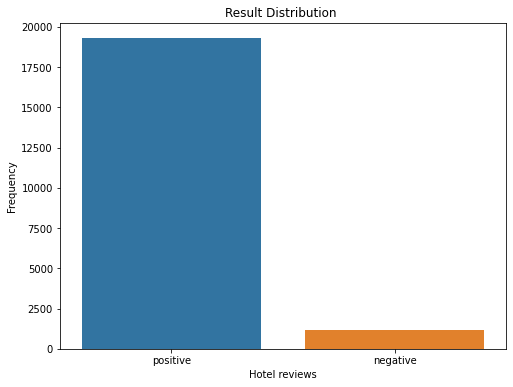

In [53]:
from six import text_type
x=data['review_segment'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x.index,x.values)
plt.title('Result Distribution ')
plt.ylabel('Frequency', fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Hotel reviews', fontsize=10)
plt.xticks(fontsize=10)
plt.show()

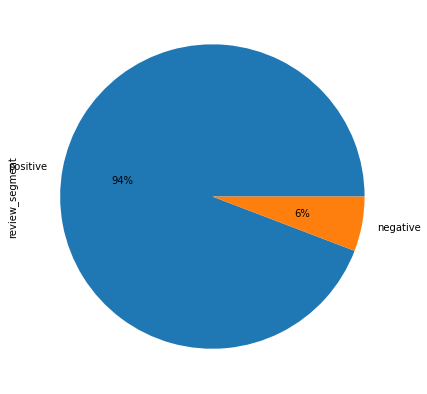

In [54]:
plt.figure(figsize=(10,7))
data['review_segment'].value_counts().plot(kind='pie',autopct='%1.0f%%')
plt.show()

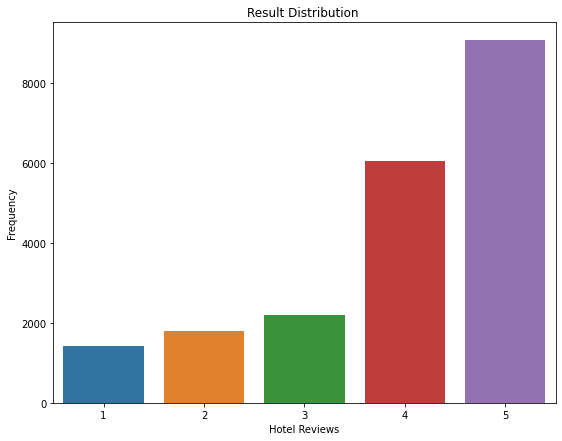

In [55]:
x=data['Rating'].value_counts()
plt.figure(figsize=(9,7))
sns.barplot(x.index,x.values)
plt.title('Result Distribution ')
plt.ylabel('Frequency', fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Hotel Reviews', fontsize=10)
plt.xticks(fontsize=10)
plt.show()

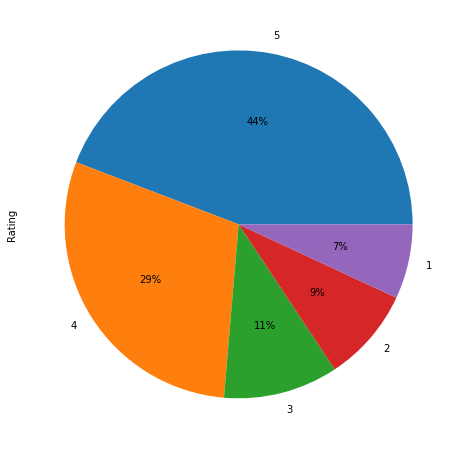

In [56]:
plt.figure(figsize=(10,8))
data['Rating'].value_counts().plot(kind='pie',autopct='%1.0f%%')
plt.show()

In [57]:
# Lemmatization
def lemmatise(sentence):
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(sentence)
    lemmatizer = WordNetLemmatizer()
    lemma_words=[lemmatizer.lemmatize(w) for w in tokens]
    return " ".join(lemma_words)
tokenizer = RegexpTokenizer(r'\w+')
data['lemmatized_content']=data['cleaned_review'].map(lambda x : tokenizer.tokenize(lemmatise(x)))
data['lemmatized_content']

0        [nice, hotel, expensive, parking, got, good, d...
1        [nothing, special, charge, diamond, member, hi...
2        [nice, room, experience, hotel, monaco, seattl...
3        [unique, great, stay, wonderful, time, hotel, ...
4        [great, stay, great, stay, went, seahawk, game...
                               ...                        
20486    [best, kept, secret, time, staying, charm, sta...
20487    [great, location, price, view, hotel, great, q...
20488    [look, nice, modern, outside, desk, staff, par...
20489    [hotel, theft, ruined, vacation, hotel, opened...
20490    [people, talking, believe, excellent, rating, ...
Name: lemmatized_content, Length: 20491, dtype: object

In [58]:
words=data['lemmatized_content']
allwords=[]
for wordlist in words:
    allwords+=wordlist
print(allwords)
print('length of all words : ',len(allwords))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# Most Common Words

In [59]:
from nltk.probability import FreqDist
mostcommon=FreqDist(allwords).most_common(100)

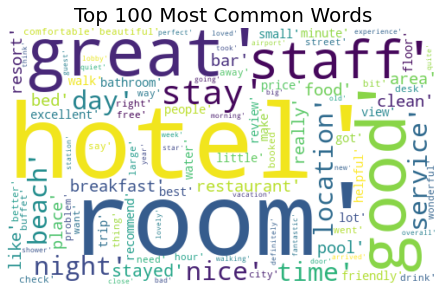

In [60]:
from wordcloud import WordCloud, ImageColorGenerator
wordcloud=WordCloud(width=500, height=300, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(6,4), facecolor='white')
plt.title('Top 100 Most Common Words', fontsize=20)
plt.axis('off')
plt.imshow(wordcloud, interpolation="bilinear")
plt.tight_layout(pad=0)
plt.show()

In [61]:
from collections import Counter
mostfreq=data.groupby('Rating')['cleaned_review'].apply(lambda x : Counter(' '.join(x).split()).most_common(25))
mostfreq

Rating
1    [(room, 4294), (hotel, 4002), (stay, 1246), (d...
2    [(room, 5772), (hotel, 4657), (night, 1618), (...
3    [(room, 6128), (hotel, 5628), (good, 2523), (n...
4    [(hotel, 15535), (room, 14239), (great, 7572),...
5    [(hotel, 24164), (room, 17314), (great, 10886)...
Name: cleaned_review, dtype: object

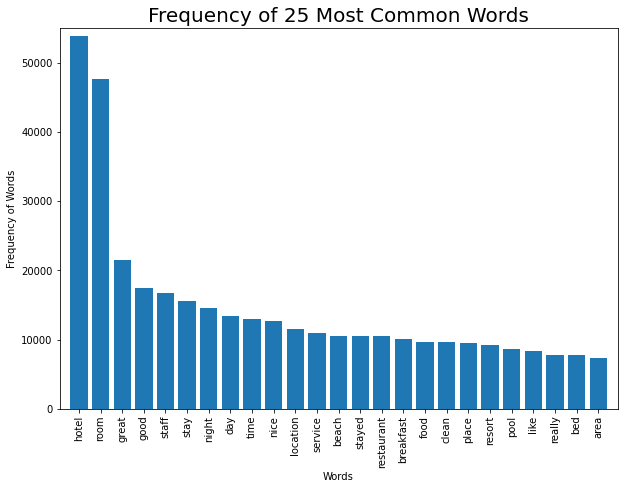

In [62]:
mostcommon_small=FreqDist(allwords).most_common(25)
x,y=zip(*mostcommon_small)
plt.figure(figsize=(10,7))
plt.margins(0.02)
plt.bar(x,y)
plt.xlabel('Words', fontsize=10)
plt.ylabel('Frequency of Words', fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(rotation=90, fontsize=10)
plt.title('Frequency of 25 Most Common Words', fontsize=20)
plt.show()

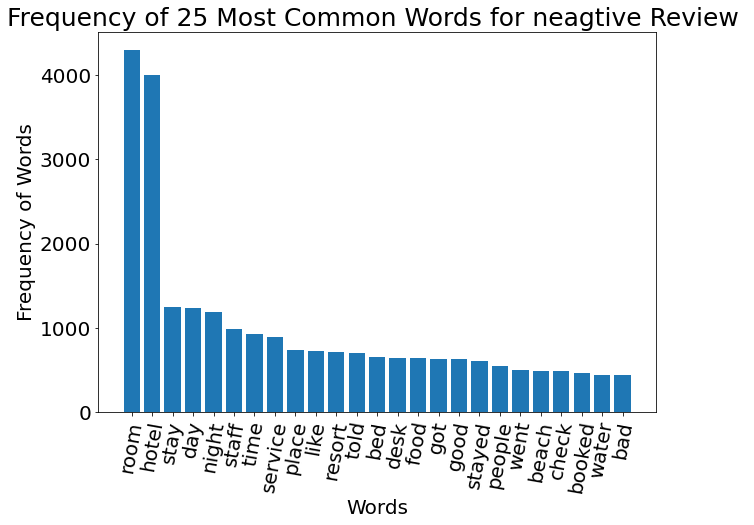

In [63]:
neagtive=mostfreq.iloc[0]
words=list(zip(*neagtive))[0]
freq=list(zip(*neagtive))[1]


plt.figure(figsize=(10,7))
plt.bar(words, freq)
plt.xlabel('Words', fontsize=20)
plt.ylabel('Frequency of Words', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(rotation=80, fontsize=20)
plt.title('Frequency of 25 Most Common Words for neagtive Review ', fontsize=25)
plt.show()

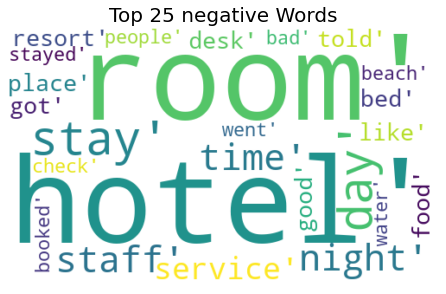

In [64]:
from wordcloud import WordCloud, ImageColorGenerator
wordcloud=WordCloud(width=500, height=300, background_color='white').generate(str(neagtive))
fig = plt.figure(figsize=(6,4), facecolor='white')
plt.title('Top 25 negative Words', fontsize=20)
plt.axis('off')
plt.imshow(wordcloud, interpolation="bilinear")
plt.tight_layout(pad=0)
plt.show()

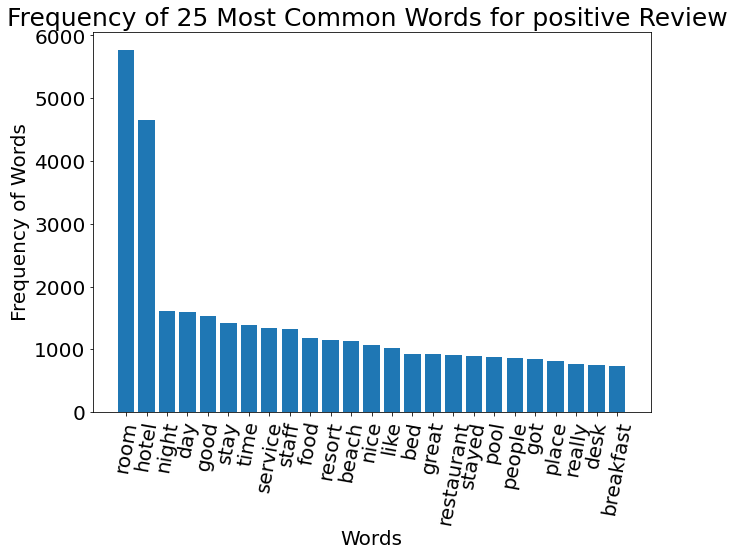

In [65]:
positive=mostfreq.iloc[1]
words=list(zip(*positive))[0]
freq=list(zip(*positive))[1]


plt.figure(figsize=(10,7))
plt.bar(words, freq)
plt.xlabel('Words', fontsize=20)
plt.ylabel('Frequency of Words', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(rotation=80, fontsize=20)
plt.title('Frequency of 25 Most Common Words for positive Review ', fontsize=25)
plt.show()

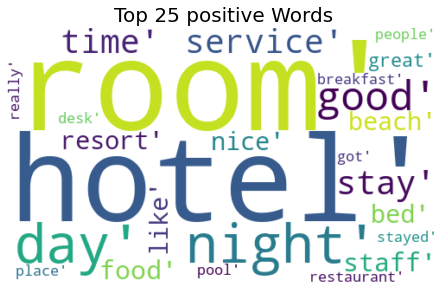

In [66]:
from wordcloud import WordCloud, ImageColorGenerator
wordcloud=WordCloud(width=500, height=300, background_color='white').generate(str(positive))
fig = plt.figure(figsize=(6,4), facecolor='white')
plt.title('Top 25 positive Words', fontsize=20)
plt.axis('off')
plt.imshow(wordcloud, interpolation="bilinear")
plt.tight_layout(pad=0)
plt.show()

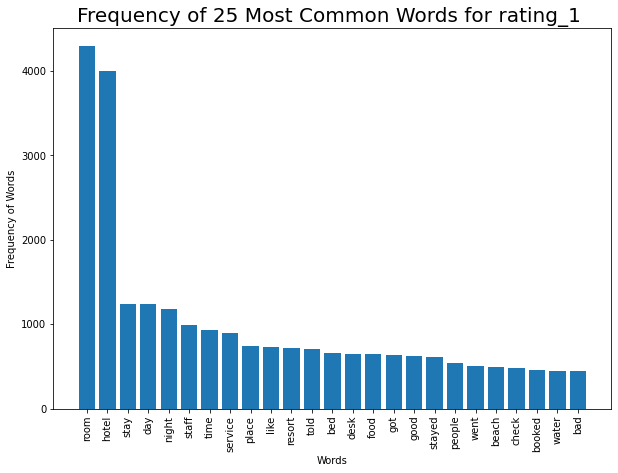

In [67]:
rating_1=mostfreq.iloc[0]
words=list(zip(*rating_1))[0]
freq=list(zip(*rating_1))[1]


plt.figure(figsize=(10,7))
plt.bar(words, freq)
plt.xlabel('Words', fontsize=10)
plt.ylabel('Frequency of Words', fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(rotation=90, fontsize=10)
plt.title('Frequency of 25 Most Common Words for rating_1 ', fontsize=20)
plt.show()

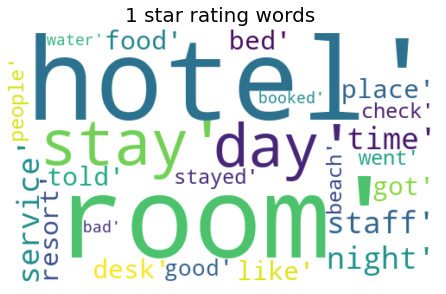

In [68]:
from wordcloud import WordCloud, ImageColorGenerator
wordcloud=WordCloud(width=500, height=300, background_color='white').generate(str(rating_1))
fig = plt.figure(figsize=(6,4), facecolor='white')
plt.title('1 star rating words ', fontsize=20)
plt.axis('off')
plt.imshow(wordcloud, interpolation="bilinear")
plt.tight_layout(pad=0)
plt.show()

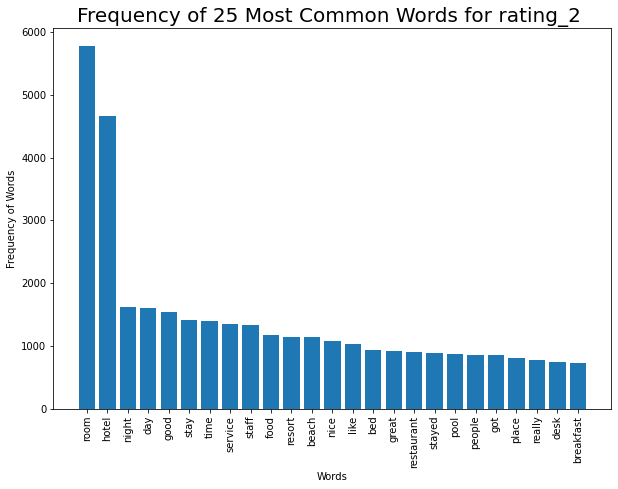

In [69]:
rating_2=mostfreq.iloc[1]
words=list(zip(*rating_2))[0]
freq=list(zip(*rating_2))[1]


plt.figure(figsize=(10,7))
plt.bar(words, freq)
plt.xlabel('Words', fontsize=10)
plt.ylabel('Frequency of Words', fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(rotation=90, fontsize=10)
plt.title('Frequency of 25 Most Common Words for rating_2 ', fontsize=20)
plt.show()

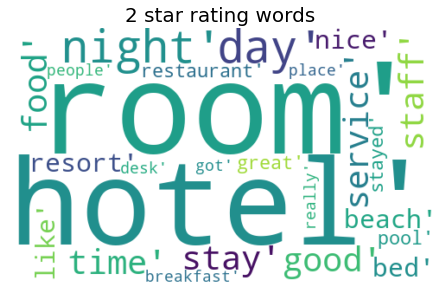

In [70]:
from wordcloud import WordCloud, ImageColorGenerator
wordcloud=WordCloud(width=500, height=300, background_color='white').generate(str(rating_2))
fig = plt.figure(figsize=(6,4), facecolor='white')
plt.title('2 star rating words ', fontsize=20)
plt.axis('off')
plt.imshow(wordcloud, interpolation="bilinear")
plt.tight_layout(pad=0)
plt.show()

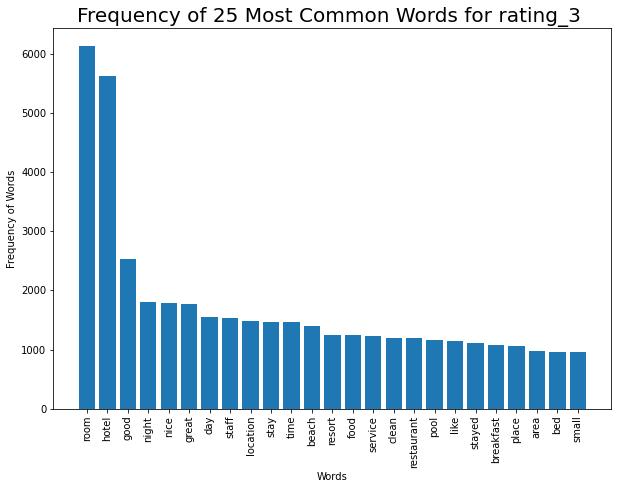

In [71]:
rating_3=mostfreq.iloc[2]
words=list(zip(*rating_3))[0]
freq=list(zip(*rating_3))[1]


plt.figure(figsize=(10,7))
plt.bar(words, freq)
plt.xlabel('Words', fontsize=10)
plt.ylabel('Frequency of Words', fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(rotation=90, fontsize=10)
plt.title('Frequency of 25 Most Common Words for rating_3 ', fontsize=20)
plt.show()

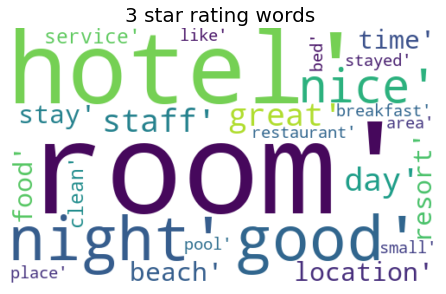

In [72]:
from wordcloud import WordCloud, ImageColorGenerator
wordcloud=WordCloud(width=500, height=300, background_color='white').generate(str(rating_3))
fig = plt.figure(figsize=(6,4), facecolor='white')
plt.title('3 star rating words ', fontsize=20)
plt.axis('off')
plt.imshow(wordcloud, interpolation="bilinear")
plt.tight_layout(pad=0)
plt.show()

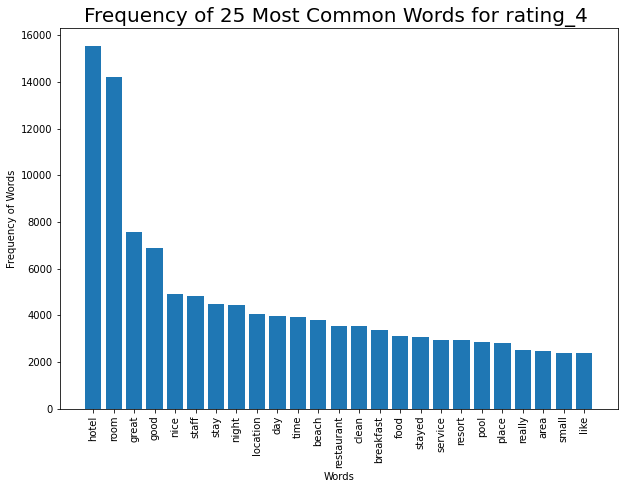

In [73]:
rating_4=mostfreq.iloc[3]
words=list(zip(*rating_4))[0]
freq=list(zip(*rating_4))[1]


plt.figure(figsize=(10,7))
plt.bar(words, freq)
plt.xlabel('Words', fontsize=10)
plt.ylabel('Frequency of Words', fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(rotation=90, fontsize=10)
plt.title('Frequency of 25 Most Common Words for rating_4 ', fontsize=20)
plt.show()

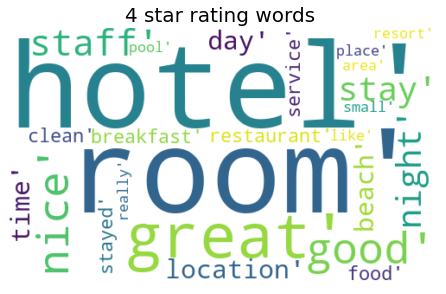

In [74]:
from wordcloud import WordCloud, ImageColorGenerator
wordcloud=WordCloud(width=500, height=300, background_color='white').generate(str(rating_4))
fig = plt.figure(figsize=(6,4), facecolor='white')
plt.title('4 star rating words ', fontsize=20)
plt.axis('off')
plt.imshow(wordcloud, interpolation="bilinear")
plt.tight_layout(pad=0)
plt.show()

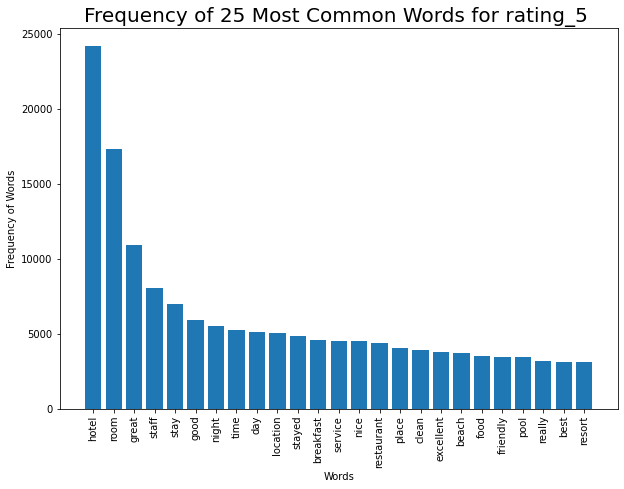

In [75]:
rating_5=mostfreq.iloc[4]
words=list(zip(*rating_5))[0]
freq=list(zip(*rating_5))[1]


plt.figure(figsize=(10,7))
plt.bar(words, freq)
plt.xlabel('Words', fontsize=10)
plt.ylabel('Frequency of Words', fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(rotation=90, fontsize=10)
plt.title('Frequency of 25 Most Common Words for rating_5 ', fontsize=20)
plt.show()

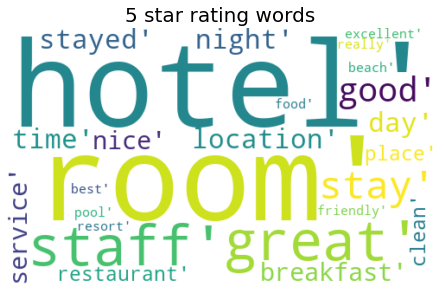

In [76]:
from wordcloud import WordCloud, ImageColorGenerator
wordcloud=WordCloud(width=500, height=300, background_color='white').generate(str(rating_5))
fig = plt.figure(figsize=(6,4), facecolor='white')
plt.title('5 star rating words ', fontsize=20)
plt.axis('off')
plt.imshow(wordcloud, interpolation="bilinear")
plt.tight_layout(pad=0)
plt.show()

# Converting data from text to numeric

In [77]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [78]:
# Using Count vectorizer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1,2))
X = vectorizer.fit_transform(words)
print(X.toarray())

[[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [79]:
vocab = vectorizer.vocabulary_
vocab

{'beach': 0,
 'best': 1,
 'breakfast': 2,
 'clean': 3,
 'day': 4,
 'excellent': 5,
 'food': 6,
 'friendly': 7,
 'good': 8,
 'great': 9,
 'hotel': 10,
 'location': 11,
 'nice': 12,
 'night': 13,
 'place': 14,
 'pool': 15,
 'really': 16,
 'resort': 17,
 'restaurant': 18,
 'room': 19,
 'service': 20,
 'staff': 21,
 'stay': 22,
 'stayed': 23,
 'time': 24}

# Using TF-IDF vectorizer

In [80]:
'''from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(reviews['cleaned_review'])
pd.DataFrame(tfidf.toarray())
'''

"from sklearn.feature_extraction.text import TfidfVectorizer\nvectorizer = TfidfVectorizer()\ntfidf = vectorizer.fit_transform(reviews['cleaned_review'])\npd.DataFrame(tfidf.toarray())\n"

In [81]:
'''
vectorizer = TfidfVectorizer()
model = vectorizer.fit(reviews['cleaned_review'])
dictionary = dict( zip( model.get_feature_names(), list(np.log(model.idf_))))
for sent in (reviews['cleaned_review']):
    for word in sent.split(): 
        tf_idf = dictionary[word.lower()]*(sent.count(word)/len(sent.split()))
        print(word+" ----> " +str(tf_idf))
'''

'\nvectorizer = TfidfVectorizer()\nmodel = vectorizer.fit(reviews[\'cleaned_review\'])\ndictionary = dict( zip( model.get_feature_names(), list(np.log(model.idf_))))\nfor sent in (reviews[\'cleaned_review\']):\n    for word in sent.split(): \n        tf_idf = dictionary[word.lower()]*(sent.count(word)/len(sent.split()))\n        print(word+" ----> " +str(tf_idf))\n'

In [82]:
tfidf_vect= TfidfVectorizer()
X_train_tfidf = tfidf_vect.fit(data['cleaned_review'])

In [83]:
X_train_tfidf_transform = X_train_tfidf.transform(data['cleaned_review'])

In [84]:
# Word2Vec
#!python -m spacy download en_core_web_lg

In [85]:
# Import spaCy and load the language library
import spacy
nlp = spacy.load('en_core_web_lg') 

In [86]:
nlp('Hotel').vector.shape

(300,)

In [87]:
doc = nlp(u'The hotel was clean and has good maintainance.')

In [88]:
# Create a three-token Doc object:
tokens = nlp(u'hotel room service')

# Iterate through token combinations:
for token1 in tokens:
    for token2 in tokens:
        print(token1.text, token2.text, token1.similarity(token2))

hotel hotel 1.0
hotel room 0.5016397833824158
hotel service 0.2857384979724884
room hotel 0.5016397833824158
room room 1.0
room service 0.11908163875341415
service hotel 0.2857384979724884
service room 0.11908163875341415
service service 1.0


# Model building

In [89]:
#SPLITTING THE DATASET INTO TRAIN AND TEST
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf_transform,data['review_segment'],
                                                    test_size=0.3, random_state=30,shuffle=True)

In [90]:
print(X_train.shape,y_train.shape)
X_test.shape,y_test.shape

(14343, 45616) (14343,)


((6148, 45616), (6148,))

In [91]:
def accuracy(y_train,y_train_pred,y_test,y_test_pred):
    print('Train Accuracy\n')
    print(classification_report(y_train,y_train_pred))
    print('\n',confusion_matrix(y_train,y_train_pred))
    print('\n',accuracy_score(y_train,y_train_pred))
    print('*'*100)
    print('Test Accuracy\n')
    print(classification_report(y_test,y_test_pred))
    print('\n',confusion_matrix(y_test,y_test_pred))
    print('\n',accuracy_score(y_test,y_test_pred)) 

In [92]:
# Logistic Regression
lg = LogisticRegression()
lg.fit(X_train,y_train)
y_train_pred = lg.predict(X_train)
y_test_pred = lg.predict(X_test)
accuracy(y_train,y_train_pred,y_test,y_test_pred)

Train Accuracy

              precision    recall  f1-score   support

    negative       1.00      0.36      0.53       866
    positive       0.96      1.00      0.98     13477

    accuracy                           0.96     14343
   macro avg       0.98      0.68      0.76     14343
weighted avg       0.96      0.96      0.95     14343


 [[  316   550]
 [    1 13476]]

 0.9615840479676497
****************************************************************************************************
Test Accuracy

              precision    recall  f1-score   support

    negative       0.95      0.24      0.38       324
    positive       0.96      1.00      0.98      5824

    accuracy                           0.96      6148
   macro avg       0.96      0.62      0.68      6148
weighted avg       0.96      0.96      0.95      6148


 [[  78  246]
 [   4 5820]]

 0.9593363695510735


In [93]:
# Random Forest Classifier
rf = RandomForestClassifier(max_features=400)
rf.fit(X_train,y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
accuracy(y_train,y_train_pred,y_test,y_test_pred)

Train Accuracy

              precision    recall  f1-score   support

    negative       1.00      1.00      1.00       866
    positive       1.00      1.00      1.00     13477

    accuracy                           1.00     14343
   macro avg       1.00      1.00      1.00     14343
weighted avg       1.00      1.00      1.00     14343


 [[  866     0]
 [    0 13477]]

 1.0
****************************************************************************************************
Test Accuracy

              precision    recall  f1-score   support

    negative       0.96      0.15      0.27       324
    positive       0.96      1.00      0.98      5824

    accuracy                           0.96      6148
   macro avg       0.96      0.58      0.62      6148
weighted avg       0.96      0.96      0.94      6148


 [[  50  274]
 [   2 5822]]

 0.9551073519843851


In [94]:
# Multinomial Naivebayes
nb= MultinomialNB()
nb.fit(X_train,y_train)
y_train_pred = nb.predict(X_train)
y_test_pred = nb.predict(X_test)
accuracy(y_train,y_train_pred,y_test,y_test_pred)

Train Accuracy

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       866
    positive       0.94      1.00      0.97     13477

    accuracy                           0.94     14343
   macro avg       0.47      0.50      0.48     14343
weighted avg       0.88      0.94      0.91     14343


 [[    0   866]
 [    0 13477]]

 0.9396221153175766
****************************************************************************************************
Test Accuracy

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       324
    positive       0.95      1.00      0.97      5824

    accuracy                           0.95      6148
   macro avg       0.47      0.50      0.49      6148
weighted avg       0.90      0.95      0.92      6148


 [[   0  324]
 [   0 5824]]

 0.9472999349381913


In [95]:
# Gradient Boosting Classifier
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_train_pred = gb.predict(X_train)
y_test_pred = gb.predict(X_test)
accuracy(y_train,y_train_pred,y_test,y_test_pred)

Train Accuracy

              precision    recall  f1-score   support

    negative       0.93      0.52      0.67       866
    positive       0.97      1.00      0.98     13477

    accuracy                           0.97     14343
   macro avg       0.95      0.76      0.82     14343
weighted avg       0.97      0.97      0.96     14343


 [[  448   418]
 [   32 13445]]

 0.9686258104998954
****************************************************************************************************
Test Accuracy

              precision    recall  f1-score   support

    negative       0.81      0.43      0.56       324
    positive       0.97      0.99      0.98      5824

    accuracy                           0.96      6148
   macro avg       0.89      0.71      0.77      6148
weighted avg       0.96      0.96      0.96      6148


 [[ 140  184]
 [  33 5791]]

 0.9647039687703318


In [96]:
# SVM
from sklearn import svm
svm1 = svm.SVC()
svm1.fit(X_train,y_train)
y_train_pred = svm1.predict(X_train)
y_test_pred = svm1.predict(X_test)
accuracy(y_train,y_train_pred,y_test,y_test_pred)

Train Accuracy

              precision    recall  f1-score   support

    negative       1.00      0.96      0.98       866
    positive       1.00      1.00      1.00     13477

    accuracy                           1.00     14343
   macro avg       1.00      0.98      0.99     14343
weighted avg       1.00      1.00      1.00     14343


 [[  832    34]
 [    0 13477]]

 0.9976295056822143
****************************************************************************************************
Test Accuracy

              precision    recall  f1-score   support

    negative       0.95      0.25      0.40       324
    positive       0.96      1.00      0.98      5824

    accuracy                           0.96      6148
   macro avg       0.96      0.63      0.69      6148
weighted avg       0.96      0.96      0.95      6148


 [[  82  242]
 [   4 5820]]

 0.9599869876382563


In [97]:
# DecissionTree
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train,y_train)
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)
accuracy(y_train,y_train_pred,y_test,y_test_pred)

Train Accuracy

              precision    recall  f1-score   support

    negative       1.00      1.00      1.00       866
    positive       1.00      1.00      1.00     13477

    accuracy                           1.00     14343
   macro avg       1.00      1.00      1.00     14343
weighted avg       1.00      1.00      1.00     14343


 [[  866     0]
 [    0 13477]]

 1.0
****************************************************************************************************
Test Accuracy

              precision    recall  f1-score   support

    negative       0.44      0.48      0.46       324
    positive       0.97      0.97      0.97      5824

    accuracy                           0.94      6148
   macro avg       0.71      0.72      0.71      6148
weighted avg       0.94      0.94      0.94      6148


 [[ 154  170]
 [ 193 5631]]

 0.9409564085881588
